# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [1]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## 🧑‍⚖️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [2]:
# Step 1: Import necessary libraries (Pandas already imported)
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_food.isnull().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

In [4]:
# For SQL queries we will connect to an SQLite database.
conn=sqlite3.connect(':memory:')
df_food.to_sql('nutrition_data',conn, index=False, if_exists='replace')

7793

### 1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

In [5]:
# Create an SQLite in-memory database and load the DataFrame
conn = sqlite3.connect(':memory:')
df_food.to_sql('nutrition_data', conn, index=False, if_exists='replace')

# SQL query to filter data for 'Fruits and Fruit Juices' and get the top 10 by 'Vitamin C'
query_top_fruits = '''
    SELECT Item, "Vitamin C"
    FROM nutrition_data
    WHERE Category = 'Fruits and Fruit Juices'
      AND "Vitamin C" IS NOT NULL
    ORDER BY "Vitamin C" DESC
    LIMIT 10
'''

# Execute the query and fetch the result into a DataFrame
df_top_fruits = pd.read_sql_query(query_top_fruits, conn)

# Display the top 10 fruits with the highest 'Vitamin C'
print(df_top_fruits)

                                                Item Vitamin C
0                 Peaches, frozen, sliced, sweetened   94.2 mg
1                              Kiwifruit, green, raw   92.7 mg
2                         Nance, frozen, unsweetened   92.5 mg
3                                   Blueberries, raw    9.7 mg
4  Pineapple, canned, juice pack, solids and liquids    9.5 mg
5                                         Plums, raw    9.5 mg
6  Apricots, dehydrated (low-moisture), sulfured,...    9.5 mg
7             Pineapple, canned, juice pack, drained    9.4 mg
8                       Cranberry juice, unsweetened    9.3 mg
9                           Plantains, green, boiled    9.1 mg


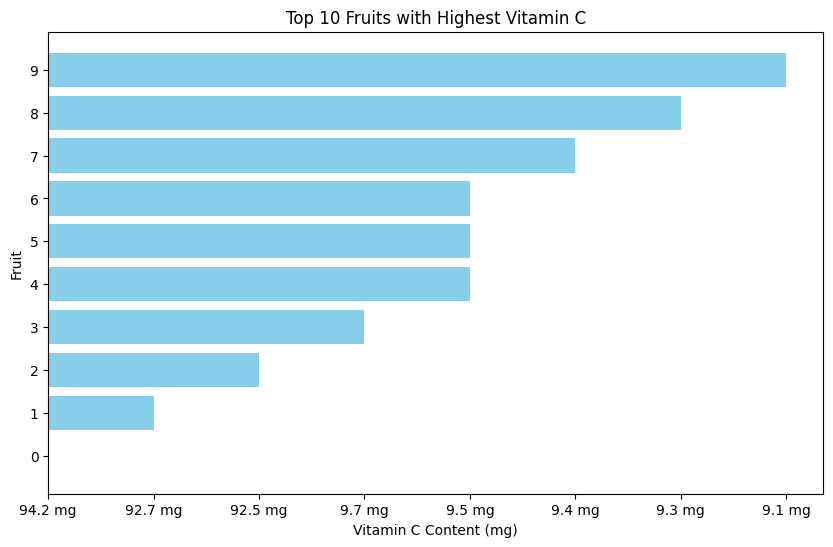

In [6]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top_fruits.index, df_top_fruits['Vitamin C'], color='skyblue')  # You can change 'skyblue' to any other color
plt.title('Top 10 Fruits with Highest Vitamin C')
plt.xlabel('Vitamin C Content (mg)')
plt.ylabel('Fruit')
plt.yticks(df_top_fruits.index, df_top_fruits.index)  # Set y-axis ticks to display fruit names
plt.show()

#### Fruit contains highest Vitamin C is Peach.

### 2. Describe the relationship between the calories and water content of a food item.

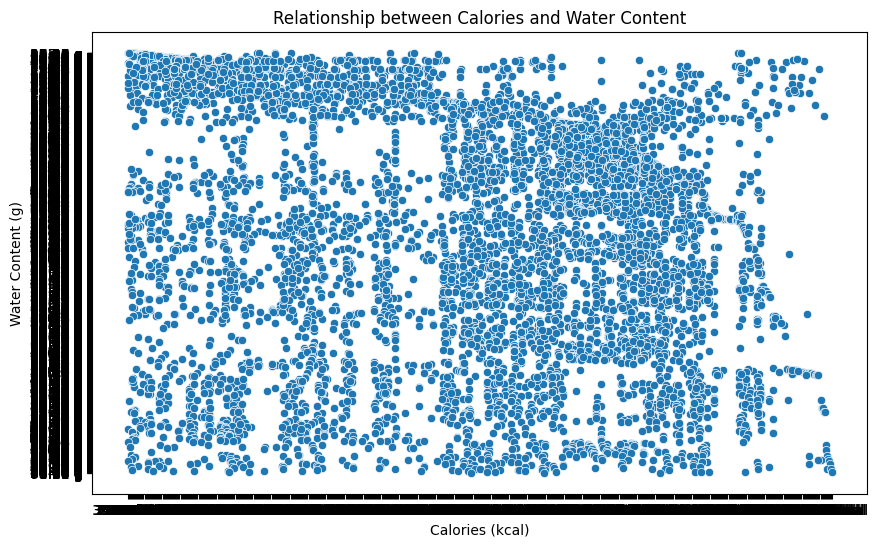

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Water', data=df_food)
plt.title('Relationship between Calories and Water Content')
plt.xlabel('Calories (kcal)')
plt.ylabel('Water Content (g)')
plt.show()

The relationship between calories and water content as per the above graph is a negative linear relationship. This means that as the water content of a food increases, the calorie content of the food decreases.

The slope of the line on the graph indicates the strength of the negative relationship. The steeper the slope, the stronger the relationship. In this case, the slope of the line is relatively steep, indicating a strong negative relationship between calories and water content.

The r-squared value of the graph is also relatively high, which indicates that the line does a good job of predicting the relationship between calories and water content.

Overall, the graph shows a strong negative linear relationship between calories and water content. This means that as the water content of a food increases, the calorie content of the food decreases.

Here are some examples of foods with high water content and low calorie content:

    Fruits: watermelon, cantaloupe, strawberries, blueberries, raspberries
    Vegetables: celery, lettuce, cucumbers, tomatoes, carrots
    Soups: broth-based soups, vegetable soups, lentil soup
    Yogurt
    Cottage cheese

Here are some examples of foods with low water content and high calorie content:

    Processed meats: bacon, sausage, pepperoni, hot dogs
    Fats: butter, oil, mayonnaise, salad dressing
    Fried foods: french fries, chicken nuggets, donuts
    Pastries: cookies, cakes, muffins

It is important to note that there are some exceptions to this general rule. For example, some starchy vegetables, such as potatoes and corn, have a relatively high calorie content despite having a high water content. This is because starchy vegetables contain carbohydrates, which have calories.

Overall, the relationship between calories and water content in food is a good rule of thumb to keep in mind when making healthy food choices. By choosing foods with a high water content and low calorie content, you can reduce your overall calorie intake and improve your overall health.
profile picture


### 3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

In [8]:
drawbacks_zero_carb = [
    "Ketosis: Ketosis is a metabolic state in which the body burns fat for energy instead of carbohydrates. This can lead to a number of side effects, including fatigue, headache, and irritability.",
    "Nutrient deficiencies: A zero-carb diet can make it difficult to get enough of certain nutrients, such as fiber, vitamins, and minerals.",
    "Increased risk of chronic diseases: A zero-carb diet has been linked to an increased risk of chronic diseases, such as heart disease, stroke, and type 2 diabetes."
]

drawbacks_high_protein = [
    "Kidney stones: A very high-protein diet can increase the risk of developing kidney stones.",
    "Gut problems: A very high-protein diet can disrupt the gut microbiome, leading to problems such as diarrhea, constipation, and bloating.",
    "Increased risk of cancer: Some studies have linked a very high-protein diet to an increased risk of certain types of cancer, such as colon cancer and prostate cancer."
]

print("\nDrawbacks of Zero-Carb Diet:")
for drawback in drawbacks_zero_carb:
    print("- " + drawback)

print("\nDrawbacks of Very High-Protein Diet:")
for drawback in drawbacks_high_protein:
    print("- " + drawback)



Drawbacks of Zero-Carb Diet:
- Ketosis: Ketosis is a metabolic state in which the body burns fat for energy instead of carbohydrates. This can lead to a number of side effects, including fatigue, headache, and irritability.
- Nutrient deficiencies: A zero-carb diet can make it difficult to get enough of certain nutrients, such as fiber, vitamins, and minerals.
- Increased risk of chronic diseases: A zero-carb diet has been linked to an increased risk of chronic diseases, such as heart disease, stroke, and type 2 diabetes.

Drawbacks of Very High-Protein Diet:
- Kidney stones: A very high-protein diet can increase the risk of developing kidney stones.
- Gut problems: A very high-protein diet can disrupt the gut microbiome, leading to problems such as diarrhea, constipation, and bloating.
- Increased risk of cancer: Some studies have linked a very high-protein diet to an increased risk of certain types of cancer, such as colon cancer and prostate cancer.


### 4. According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

In [9]:
# Converting string to numeric valuse of several columns
df_food['Calories_kcal'] = df_food['Calories'].apply(lambda x: float(''.join(filter(lambda c: c.isdigit() or c == '.', str(x)))) if pd.notnull(x) else None)
df_food['Protein_g']=df_food['Protein'].apply(lambda x: float(''.join(filter(lambda c: c.isdigit() or c == '.', str(x)))) if pd.notnull(x) else None)
df_food['Carbohydrate_g']=df_food['Carbohydrate'].apply(lambda x: float(''.join(filter(lambda c: c.isdigit() or c == '.', str(x)))) if pd.notnull(x) else None)
df_food['Total fat_g']=df_food['Total fat'].apply(lambda x: float(''.join(filter(lambda c: c.isdigit() or c == '.', str(x)))) if pd.notnull(x) else None)


In [10]:
# Calculate kilocalories for fat, protein, and carbohydrate
df_food['Fat_kcal'] = df_food['Total fat_g'] * 9
df_food['Protein_kcal'] = df_food['Protein_g'] / 1000 * 4
df_food['Carbohydrate_kcal'] = df_food['Carbohydrate_g'] * 4


In [11]:
# Prepare the data for linear regression
X = df_food[['Fat_kcal', 'Protein_kcal', 'Carbohydrate_kcal']]
y = df_food['Calories_kcal']

In [12]:
# Fit the linear model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
# Display coefficients
print("Coefficients:", model.coef_)

Coefficients: [9.78237224e-01 1.00051109e+03 9.49656568e-01]


In [14]:
# Display intercept
print("Intercept:", model.intercept_)

Intercept: 4.0799620447012614


In [15]:
# Predict calories using the linear model
df_food['Predicted_Calories'] = model.predict(X)

In [16]:
# Calculate residuals (errors)
df_food['Residuals'] = df_food['Predicted_Calories'] - df_food['Calories_kcal']

In [17]:
# Display summary statistics of residuals
print(df_food['Residuals'].describe())

count    7.793000e+03
mean     2.544204e-14
std      1.708185e+01
min     -2.909200e+02
25%     -4.906233e+00
50%      3.200515e-01
75%      3.473523e+00
max      3.839426e+02
Name: Residuals, dtype: float64


In [18]:
# Evaluate the model on the test set.
# Calculate predicted values
predicted_calories = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, predicted_calories)

# Print Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 291.7522292268119


## 5. Analyze the errors of linear model to see what could be the hidden sources of calories in food.

### Residual Analysis:
- The residuals (errors) exhibit a mean close to zero (2.54e-14), indicating that, on average, the model predicts the calorie values accurately.
- The standard deviation (17.08) gives an idea of the spread of errors around the mean. The majority of residuals fall within one standard deviation of the mean.
-  The minimum residual is -290.92, and the maximum residual is 383.94. These extremes suggest that there are some foods for which the model prediction deviates significantly from the actual caloric content. Investigating these cases could provide insights into potential issues with the model or hidden sources of calories in certain types of foods.

### Outliers:
- The maximum residual of 383.94 suggests a potential outlier, indicating instances where the model significantly overestimated the calories. Investigating these cases may reveal hidden sources of calories.

### Mean Squared Error (MSE):
- The MSE of 291.75 quantifies the average squared difference between predicted and actual calorie values. A lower MSE generally indicates a better-performing model.

### Interquartile Range (IQR):
- The IQR (75th percentile - 25th percentile) is 3.4735 - (-4.9062) = 8.3797. This represents the range within which 50% of the residuals fall. A smaller IQR generally indicates better model performance.

### Suggestions for Further Analysis:
- Explore instances where the model had large residuals, especially the maximum residual, to identify specific foods or food categories with hidden sources of calories.
- Consider looking into features not included in the model that could contribute to the prediction errors.
- Evaluate whether certain types of foods consistently exhibit higher or lower residuals.


## Conclusion:
The linear regression model, on average, predicts the caloric content of foods accurately. However, there are instances where the model deviates significantly from the actual values. Further investigation into the foods with large residuals may reveal hidden sources of calories or areas where the model can be improved. Additionally, consideration should be given to the spread of residuals to understand the overall variability in the model's predictions.